# Bachelor Thesis Code

Anja Urbanc - 2081518

## Descriptive Statistics

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [53]:
dataset = pd.read_csv("dataset.csv", delimiter = ";")
print(dataset.columns)
print(dataset)

Index(['headphones', 'width', 'height', 'fov', 'fps', 'stereopsis',
       'antialiasing', 'textures', 'lightMode', 'saturation', 'brightness',
       'contrast', 'sharpness', 'shadowStrength', 'reflections',
       'modelsDetail', 'dof', 'particles', 'locomotion', 'ambientSound',
       'reverbZone', 'spatialSound', 'time', 'totalImmersion'],
      dtype='object')
     headphones      width     height  fov  fps  stereopsis  antialiasing  \
0             1  1641.3370   911.8539   37   60           1             1   
1             1  1282.1180   712.2877   39   55           1             1   
2             1  1795.5310   997.5171   40   47           1             1   
3             2   838.4885   465.8270   44   48           0             0   
4             2  1924.7020  1069.2790   85   35           1             1   
..          ...        ...        ...  ...  ...         ...           ...   
396           2   681.5455   378.6364   74   26           0             1   
397           2 

In [54]:
import pandas as pd

# Compute mean and standard deviation for each column
means = dataset.mean()
stds = dataset.std()

# Combine into a DataFrame for better visualization
summary_stats = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': stds
})

summary_stats

,Mean,Standard Deviation
headphones,1.149626,0.701823
width,1204.965531,574.094938
height,669.425287,318.941619
fov,64.628429,20.599492
fps,37.264339,13.359077
stereopsis,0.541147,0.498927
antialiasing,0.483791,0.500361
textures,0.491272,0.500548
lightMode,0.521197,0.500175
saturation,-0.019753,0.552263


Establish which audio output contributes most to immersion

In [4]:
audio_output_immersion_level = dataset.groupby(['headphones'])[['totalImmersion']].mean()
audio_output_immersion_level

,totalImmersion
headphones,
0,35.342466
1,39.728205
2,44.473684


The table above represents:

- 0 (no sound) has on average a 35.34% level of immersion.
- 1 (computer speakers) has o average a 39.73% level of immersion.
- 2 (headphones) has on average a 44.47% level of immersion.

The data shows that the headphones audio type is most likely to yield a higher level of immersion for the particiapnt, compared to computer speaker audio type and no sound.

In [5]:
audio_output_immersion_level_configurations = dataset.groupby(['headphones','ambientSound', 'spatialSound', 'reverbZone'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations.sample(10)

,headphones,ambientSound,spatialSound,reverbZone,totalImmersion
18,2,0,1,0,47.600000
10,1,0,1,0,37.740741
19,2,0,1,1,42.823529
21,2,1,0,1,38.750000
15,1,1,1,1,35.454545
9,1,0,0,1,41.277778
14,1,1,1,0,41.120000
4,0,1,0,0,64.500000
8,1,0,0,0,38.458333
12,1,1,0,0,45.160000


In [6]:
audio_output_immersion_level_configurations = dataset.groupby(['headphones','ambientSound', 'spatialSound', 'reverbZone'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,headphones,ambientSound,spatialSound,reverbZone,totalImmersion
0,0,0,0,0,36.500000
1,0,0,0,1,35.461538
2,0,0,1,0,35.000000
3,0,0,1,1,36.222222
4,0,1,0,0,64.500000
5,0,1,0,1,38.375000
6,0,1,1,0,32.647059
7,0,1,1,1,30.300000
8,1,0,0,0,38.458333
9,1,0,0,1,41.277778


In [7]:
audio_output_immersion_level_configurations = dataset.groupby(['headphones', 'locomotion'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,headphones,locomotion,totalImmersion
0,0,1,28.785714
1,0,2,35.875000
2,0,3,39.052632
3,1,1,31.957447
4,1,2,39.619048
5,1,3,48.488372
6,2,1,36.972973
7,2,2,44.266667
8,2,3,52.527778


In [8]:
audio_output_immersion_level_configurations = dataset.groupby(['ambientSound'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,ambientSound,totalImmersion
0,0,40.158416
1,1,40.854271


In [9]:
audio_output_immersion_level_configurations = dataset.groupby(['spatialSound'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,spatialSound,totalImmersion
0,0,40.549451
1,1,40.465753


In [10]:
audio_output_immersion_level_configurations = dataset.groupby(['reverbZone'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,reverbZone,totalImmersion
0,0,42.153110
1,1,38.708333


In [12]:
audio_output_immersion_level_configurations = dataset.groupby(['textures', 'locomotion', 'headphones'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,textures,locomotion,headphones,totalImmersion
0,0,1,0,16.571429
1,0,1,1,28.307692
2,0,1,2,27.100000
3,0,2,0,29.739130
4,0,2,1,31.387755
5,0,2,2,39.733333
6,0,3,0,28.375000
7,0,3,1,40.227273
8,0,3,2,43.526316
9,1,1,0,41.000000


In [13]:
audio_output_immersion_level_configurations = dataset.groupby(['textures', 'locomotion', 'headphones', 'reverbZone'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,textures,locomotion,headphones,reverbZone,totalImmersion
0,0,1,0,0,17.000000
1,0,1,0,1,15.500000
2,0,1,1,0,25.181818
3,0,1,1,1,30.600000
4,0,1,2,0,28.916667
5,0,1,2,1,24.375000
6,0,2,0,0,29.333333
7,0,2,0,1,30.181818
8,0,2,1,0,29.318182
9,0,2,1,1,33.074074


In [14]:
audio_output_immersion_level_configurations = dataset.groupby(['textures', 'locomotion', 'headphones', 'ambientSound'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,textures,locomotion,headphones,ambientSound,totalImmersion
0,0,1,0,0,15.000000
1,0,1,0,1,17.200000
2,0,1,1,0,27.700000
3,0,1,1,1,28.687500
4,0,1,2,0,28.916667
5,0,1,2,1,24.375000
6,0,2,0,0,33.615385
7,0,2,0,1,24.700000
8,0,2,1,0,30.433333
9,0,2,1,1,32.894737


In [15]:
audio_output_immersion_level_configurations = dataset.groupby(['textures', 'locomotion', 'headphones', 'spatialSound'])['totalImmersion'].mean().reset_index()
audio_output_immersion_level_configurations

,textures,locomotion,headphones,spatialSound,totalImmersion
0,0,1,0,0,15.500000
1,0,1,0,1,17.000000
2,0,1,1,0,30.363636
3,0,1,1,1,26.800000
4,0,1,2,0,27.750000
5,0,1,2,1,26.125000
6,0,2,0,0,31.625000
7,0,2,0,1,28.733333
8,0,2,1,0,34.266667
9,0,2,1,1,30.117647


The above data analyzes the relationship between audio type(no sound, speakers, headphones) and audio configurations (ambient sound, spatial sound, and reverberation) on the perceived level of immersion by the user utilizing a sample size of 10.

/var/folders/qr/2bxl5t0n7wg4n3zsm7ll6bc00000gn/T/ipykernel_38422/1595301113.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='headphones', data=dataset, palette='viridis')


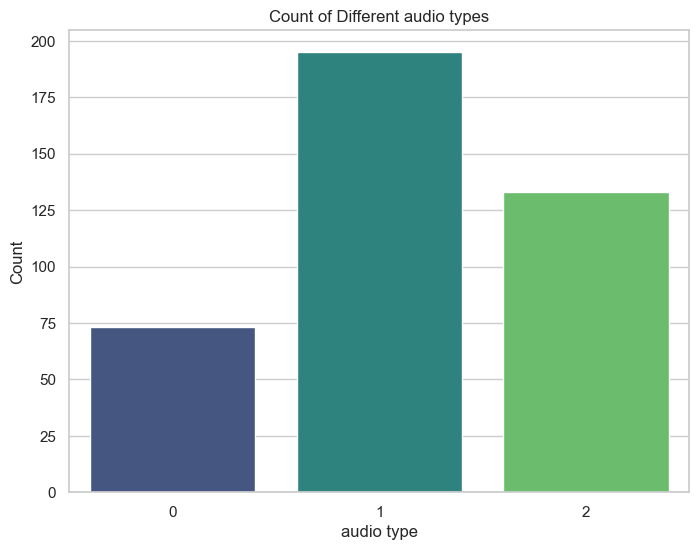

In [16]:
# Create a count plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='headphones', data=dataset, palette='viridis')
plt.title("Count of Different audio types")
plt.xlabel("audio type")
plt.ylabel("Count")
plt.show()

/var/folders/qr/2bxl5t0n7wg4n3zsm7ll6bc00000gn/T/ipykernel_38422/3357549493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ambientSound', data=dataset, palette='viridis')


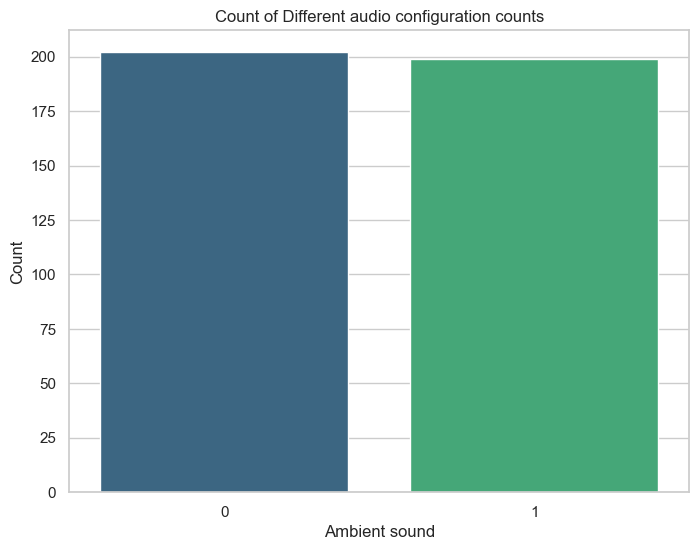

In [17]:
# Create a count plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='ambientSound', data=dataset, palette='viridis')
plt.title("Count of Different audio configuration counts")
plt.xlabel("Ambient sound")
plt.ylabel("Count")
plt.show()

/var/folders/qr/2bxl5t0n7wg4n3zsm7ll6bc00000gn/T/ipykernel_38422/55578592.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spatialSound', data=dataset, palette='viridis')


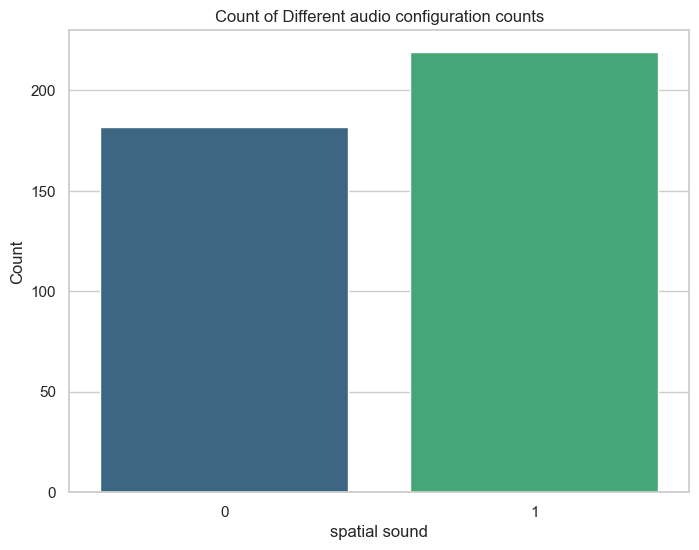

In [18]:
# Create a count plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='spatialSound', data=dataset, palette='viridis')
plt.title("Count of Different audio configuration counts")
plt.xlabel("spatial sound")
plt.ylabel("Count")
plt.show()

/var/folders/qr/2bxl5t0n7wg4n3zsm7ll6bc00000gn/T/ipykernel_38422/2014919609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reverbZone', data=dataset, palette='viridis')


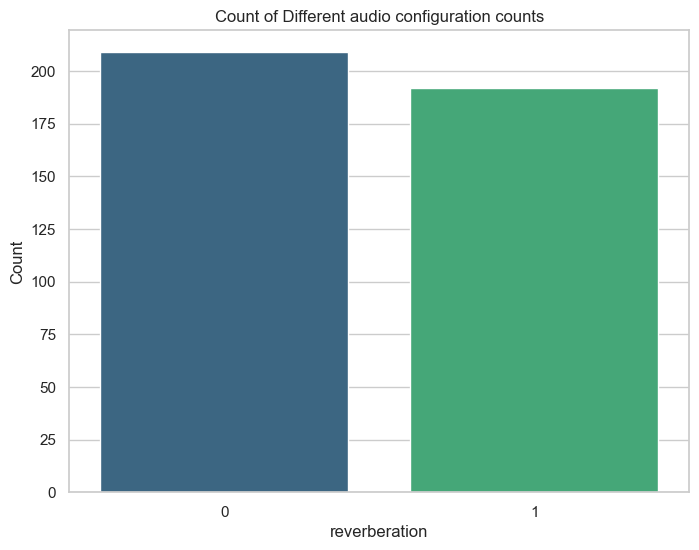

In [19]:
# Create a count plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='reverbZone', data=dataset, palette='viridis')
plt.title("Count of Different audio configuration counts")
plt.xlabel("reverberation")
plt.ylabel("Count")
plt.show()

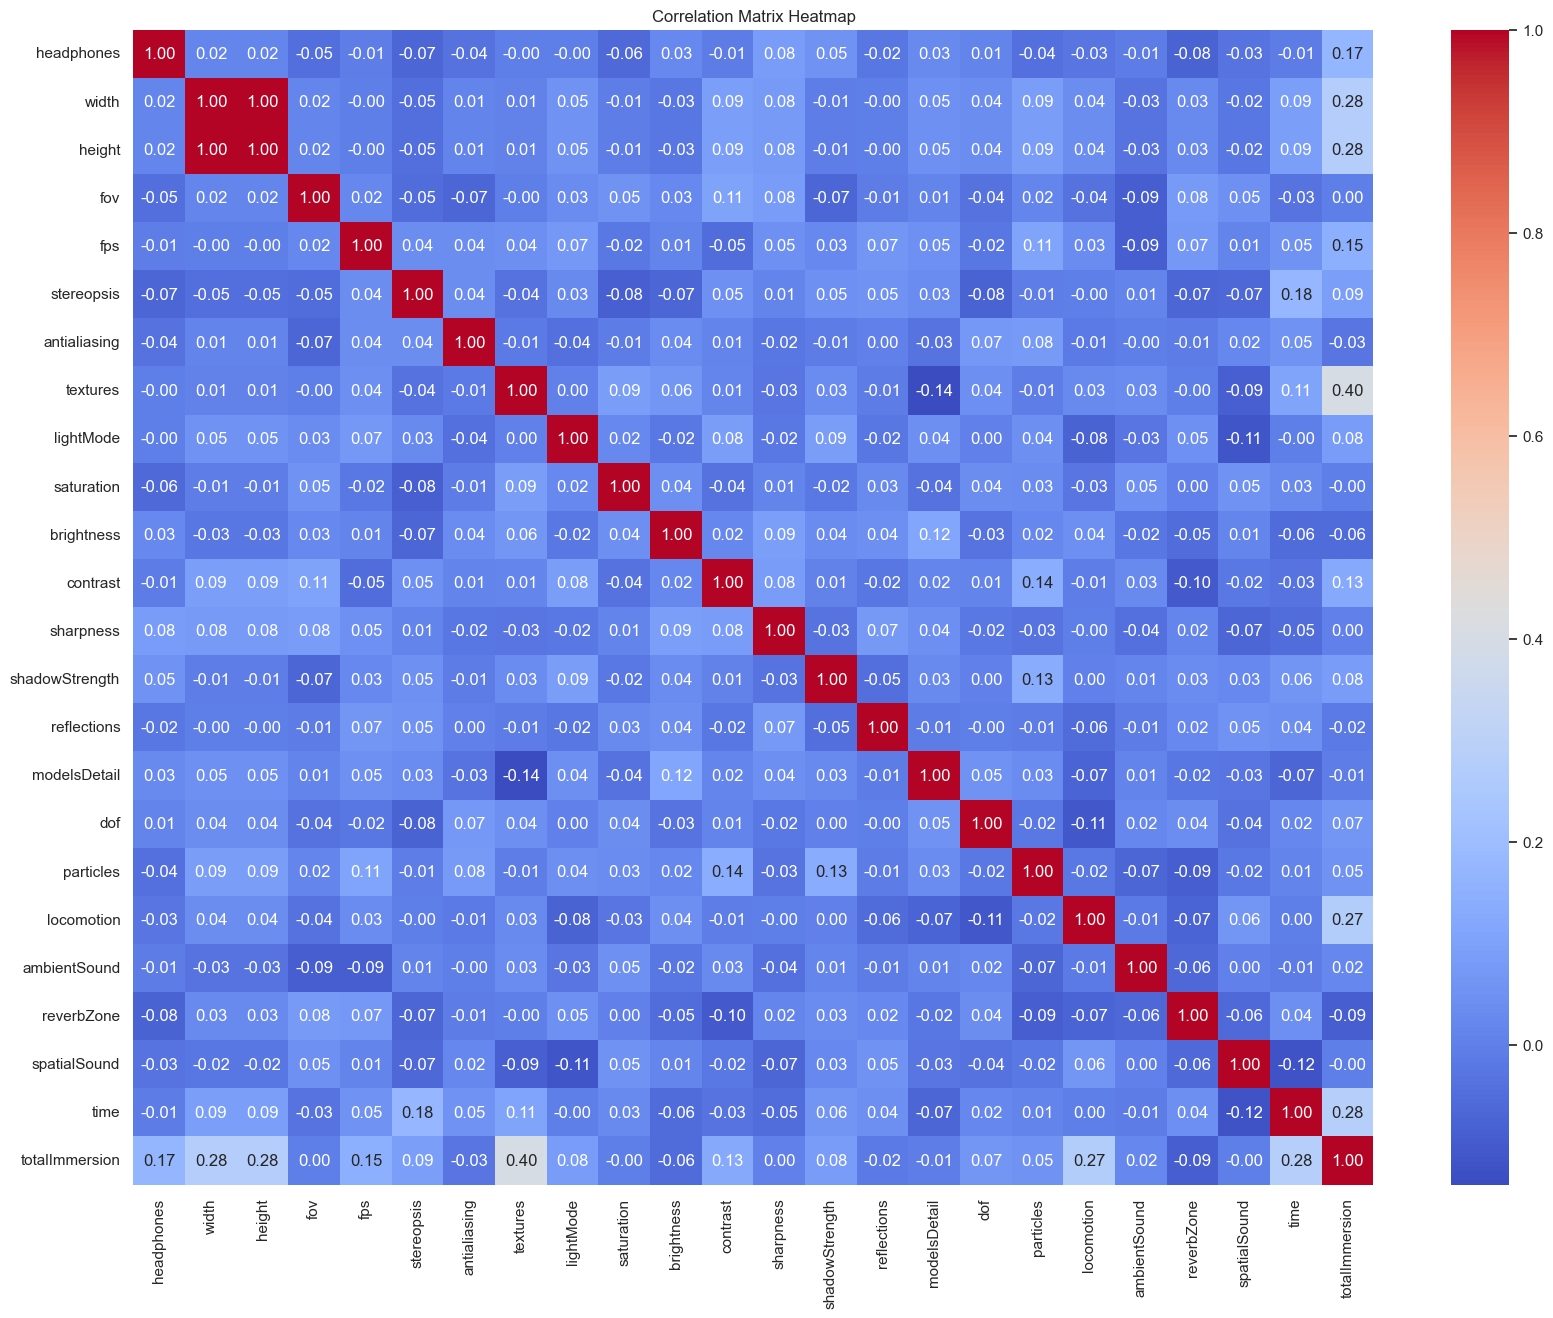

In [20]:
# compute the correlation matrix for the numerical and binary variables
correlation_matrix = dataset.apply(lambda x: x.astype(float)).corr()

# plot the heatmap of the corr matrix
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

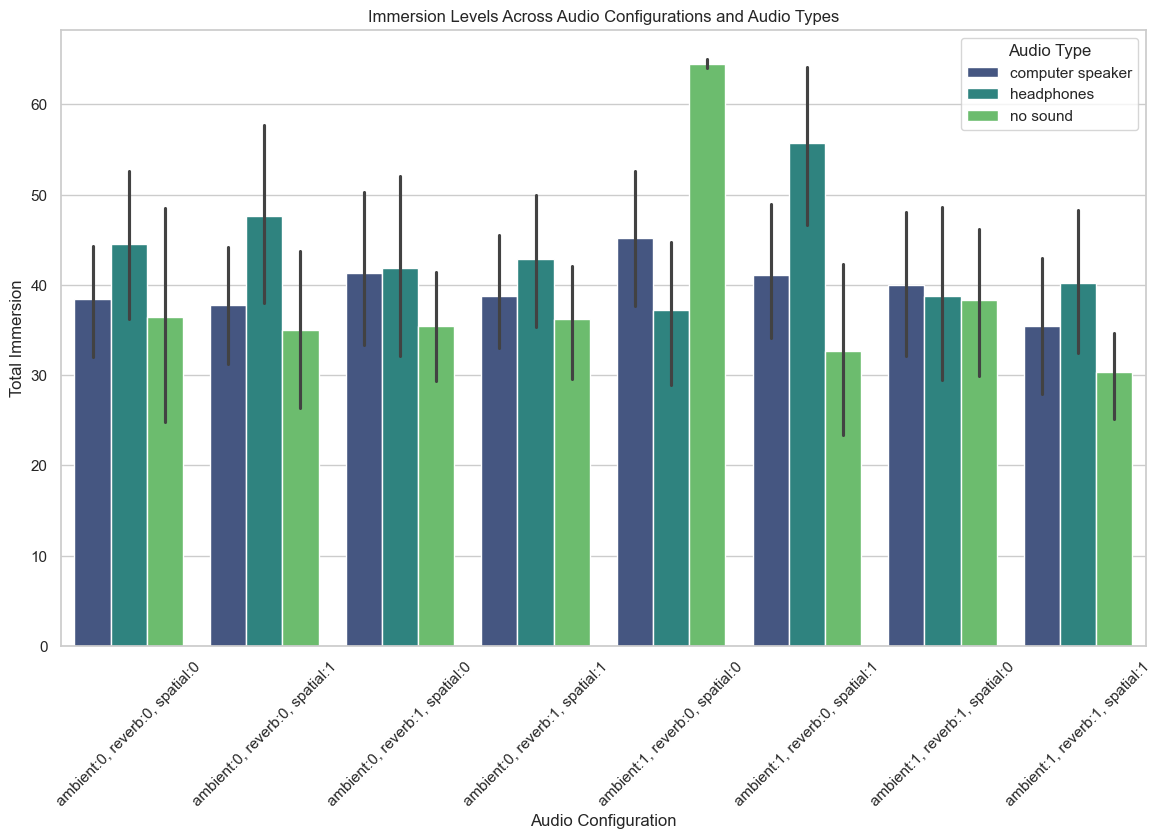

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapping dictionary
headphones_mapping = {
    0: "no sound",
    1: "computer speaker",
    2: "headphones"
}
dataset['headphones'] = dataset['headphones'].map(headphones_mapping)

# Create audio configuration column
dataset['audio_configuration'] = 'Other'
dataset.loc[dataset['ambientSound'] == 1, 'audio_configuration'] = 'ambient_sound'
dataset.loc[dataset['reverbZone'] == 1, 'audio_configuration'] = 'reverb'
dataset.loc[dataset['spatialSound'] == 1, 'audio_configuration'] = 'spatial_sound'

# Combine all possible combinations
dataset['audio_configuration'] = dataset.apply(
    lambda x: f"ambient:{x['ambientSound']}, reverb:{x['reverbZone']}, spatial:{x['spatialSound']}",
    axis=1
)

# Convert to categorical
dataset['audio_configuration'] = dataset['audio_configuration'].astype('category')

# Create a grouped bar plot to show immersion levels
plt.figure(figsize = (14, 8))
sns.set(style = 'whitegrid')
sns.barplot(data = dataset, x = 'audio_configuration', y = 'totalImmersion', hue = 'headphones', palette = 'viridis')

plt.title("Immersion Levels Across Audio Configurations and Audio Types")
plt.xlabel("Audio Configuration")
plt.ylabel("Total Immersion")
plt.legend(title = "Audio Type")
plt.xticks(rotation=45)
plt.show()

## Machine Learning models

### 1. Preprocessing

In [22]:
data = pd.read_csv("dataset.csv", delimiter = ";")
df = pd.DataFrame(data)
df.head()

,headphones,width,height,fov,fps,stereopsis,antialiasing,textures,lightMode,saturation,...,reflections,modelsDetail,dof,particles,locomotion,ambientSound,reverbZone,spatialSound,time,totalImmersion
0,1,1641.3370,911.8539,37,60,1,1,1,0,-0.450232,...,1,0,0,1,3,0,1,1,1196,80
1,1,1282.1180,712.2877,39,55,1,1,1,1,-0.234574,...,1,1,1,1,1,1,1,0,1194,82
2,1,1795.5310,997.5171,40,47,1,1,0,1,-0.551438,...,1,0,0,0,1,1,1,0,1196,44
3,2,838.4885,465.8270,44,48,0,0,1,0,-0.832656,...,1,0,1,0,3,0,0,0,1197,77
4,2,1924.7020,1069.2790,85,35,1,1,1,1,-0.376218,...,1,0,0,0,2,1,0,1,600,66


#### 1.1 Feature engineering

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   headphones      401 non-null    int64  
 1   width           401 non-null    float64
 2   height          401 non-null    float64
 3   fov             401 non-null    int64  
 4   fps             401 non-null    int64  
 5   stereopsis      401 non-null    int64  
 6   antialiasing    401 non-null    int64  
 7   textures        401 non-null    int64  
 8   lightMode       401 non-null    int64  
 9   saturation      401 non-null    float64
 10  brightness      401 non-null    float64
 11  contrast        401 non-null    float64
 12  sharpness       401 non-null    float64
 13  shadowStrength  401 non-null    float64
 14  reflections     401 non-null    int64  
 15  modelsDetail    401 non-null    int64  
 16  dof             401 non-null    int64  
 17  particles       401 non-null    int

In [24]:
target_balance1 = df['headphones'].value_counts(normalize=True)
print(target_balance1)

target_balance2 = df['ambientSound'].value_counts(normalize=True)
print(target_balance2)

target_balance3 = df['reverbZone'].value_counts(normalize=True)
print(target_balance3)

target_balance4 = df['spatialSound'].value_counts(normalize=True)
print(target_balance4)

headphones
1    0.486284
2    0.331671
0    0.182045
Name: proportion, dtype: float64
ambientSound
0    0.503741
1    0.496259
Name: proportion, dtype: float64
reverbZone
0    0.521197
1    0.478803
Name: proportion, dtype: float64
spatialSound
1    0.546135
0    0.453865
Name: proportion, dtype: float64


The variables that will be analyzed are relatively balanced (ambient sound is enabled in 50.37% cases and disabled in 49.63% of the cases; reverberation is enabled in 52.12% of the cases and disabled in 47.88% of the cases; spatial sound is enabled 54.61% of the time and disabled 45.39% of the time) and do not require techniques for handling label imbalance. The audio type variable is considered unbalanced and will therefore be evaluated using SMOTE to make the analysis more accurate.

#### 1.2 Feature selection

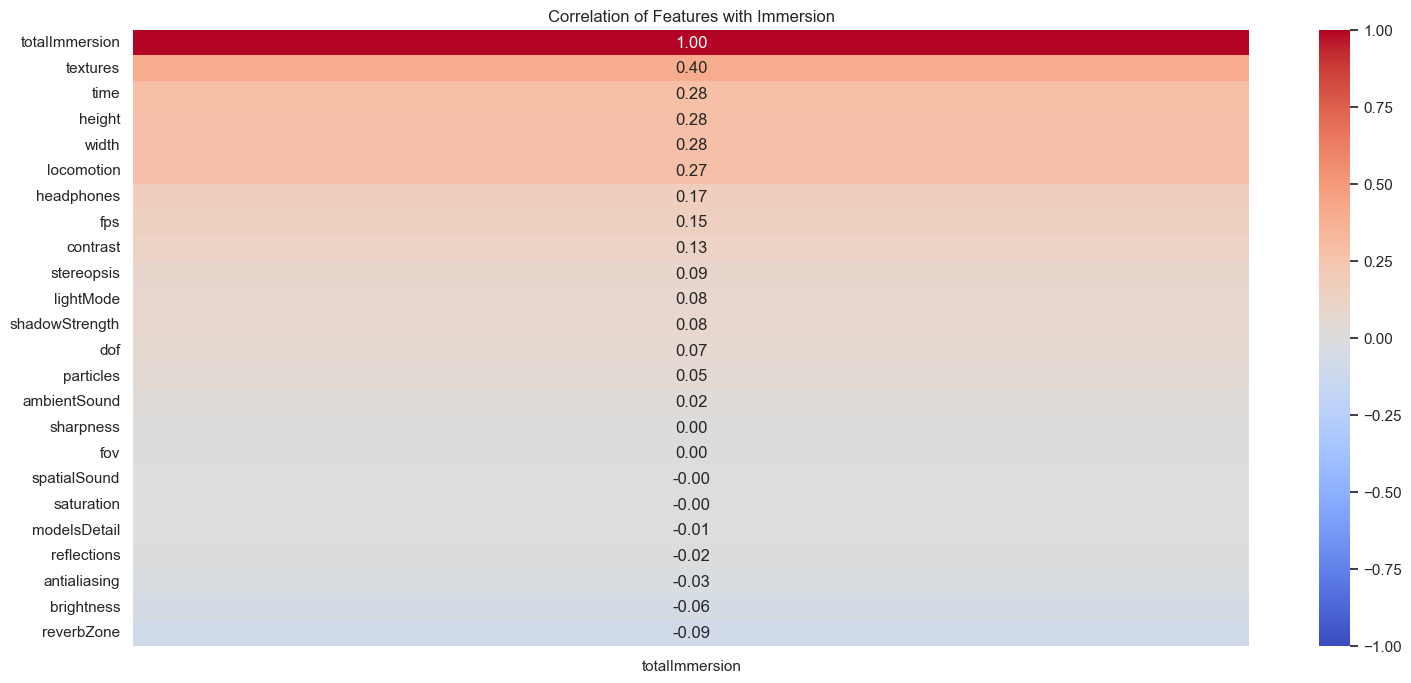

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix of the data
correlation_matrix = df.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix[['totalImmersion']].sort_values(by='totalImmersion', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

# Set the title of the plot
plt.title("Correlation of Features with Immersion")

# Display the plot
plt.show()

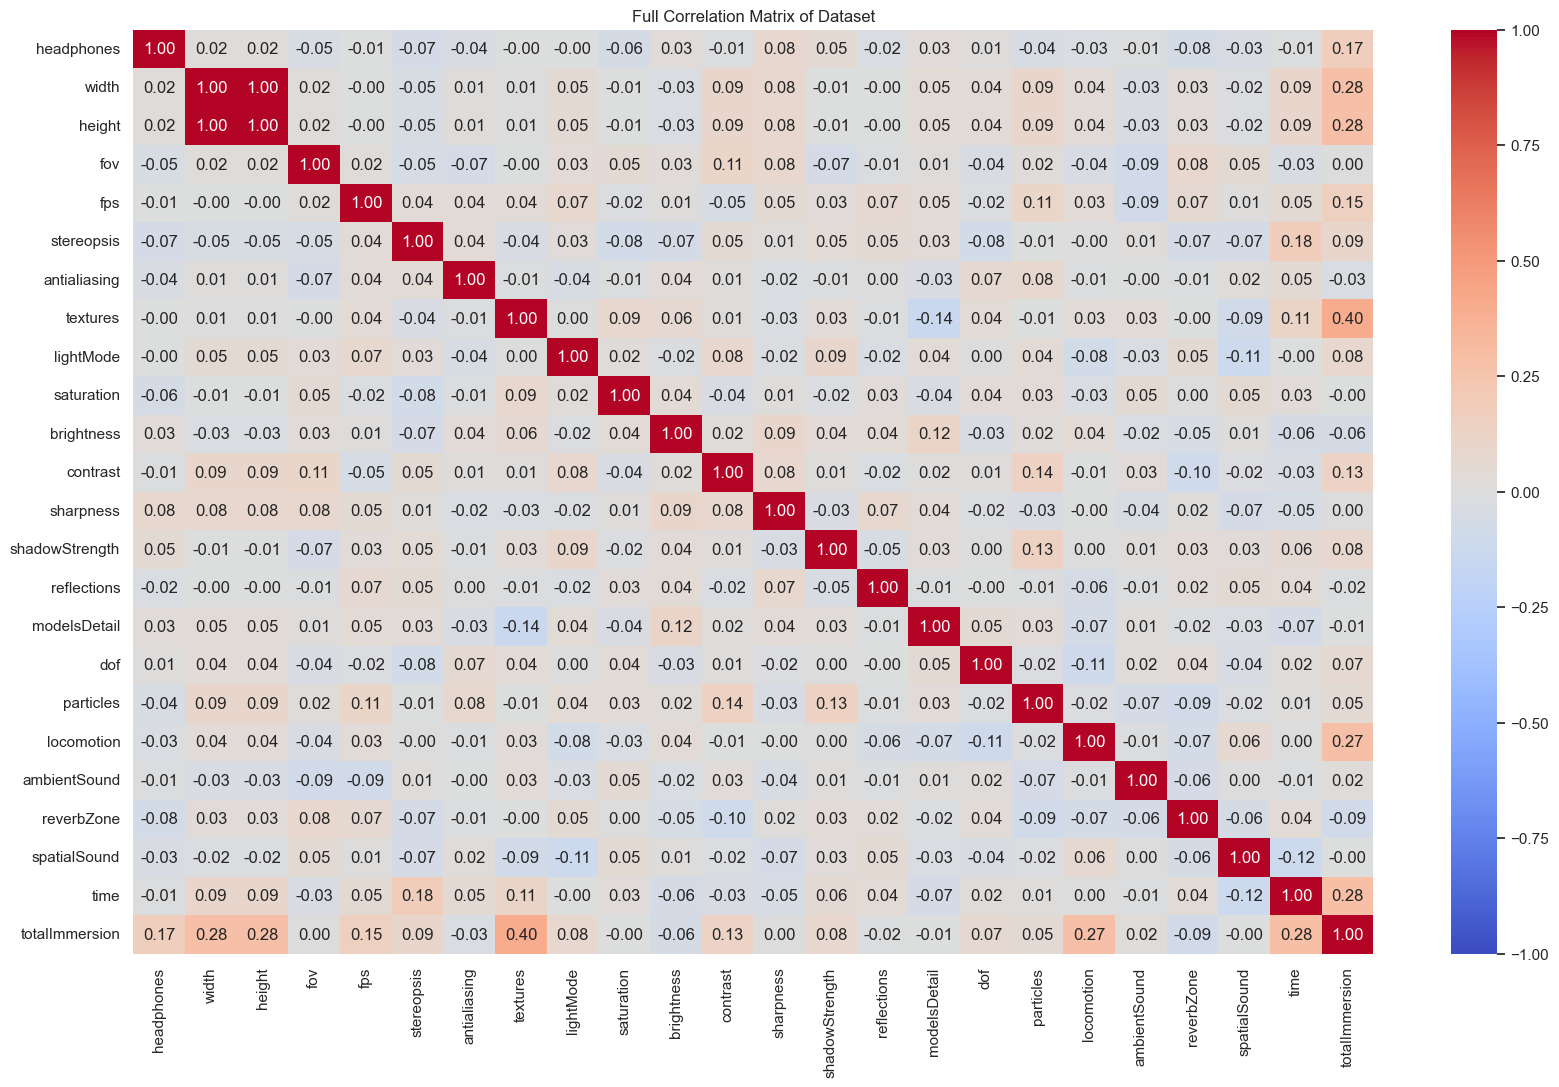

In [26]:
plt.figure(figsize=(20, 12))

# Creating a heatmap to visualize the correlation matrix with the same parameters to the previous step
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

# Setting the title of the plot
plt.title("Full Correlation Matrix of Dataset")

# Displaying the plot
plt.show()

#### 1.2 Standardize

In [20]:
# Identify non-binary features
non_binary_features = [col for col in df.columns if df[col].nunique() > 2]
print("Non-binary features:", non_binary_features)

Non-binary features: ['headphones', 'width', 'height', 'fov', 'fps', 'saturation', 'brightness', 'contrast', 'sharpness', 'shadowStrength', 'locomotion', 'time', 'totalImmersion']


In [21]:
from sklearn.preprocessing import StandardScaler

# Select columns to be standardized (non-binary features)
columns_to_standardize = ['width', 'height', 'fov', 'fps', 'time', 'totalImmersion']

# Standardizing these columns
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.head()

,headphones,width,height,fov,fps,stereopsis,antialiasing,textures,lightMode,saturation,...,reflections,modelsDetail,dof,particles,locomotion,ambientSound,reverbZone,spatialSound,time,totalImmersion
0,1,0.761053,0.761053,-1.342894,1.704015,1,1,1,0,-0.450232,...,1,0,0,1,3,0,1,1,1.758433,2.104574
1,1,0.134558,0.134557,-1.245683,1.329270,1,1,1,1,-0.234574,...,1,1,1,1,1,1,1,0,1.749623,2.211145
2,1,1.029975,1.029974,-1.197078,0.729678,1,1,0,1,-0.551438,...,1,0,0,0,1,1,1,0,1.758433,0.186300
3,2,-0.639154,-0.639153,-1.002656,0.804627,0,0,1,0,-0.832656,...,1,0,1,0,3,0,0,0,1.762838,1.944718
4,2,1.255255,1.255255,0.990171,-0.169710,1,1,1,1,-0.376218,...,1,0,0,0,2,1,0,1,-0.866804,1.358579


### 2. Train baseline model

#### 2.1 Split the data

In [27]:
X = df.drop(columns=['totalImmersion'])
y = df['totalImmersion']

# Split data into train and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 280
Testing set size: 121


#### 2.2 Fit a linear regression model to the data

In [28]:
# Linear regression 
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_r2 = linreg.score(X_test, y_test)

# Dummy Regression
dummyreg = DummyRegressor()
dummyreg.fit(X_train, y_train)
dummyreg_r2 = dummyreg.score(X_test, y_test)

print("Linear regression R-squared score on test data: {}".format(linreg_r2))
print("Dummy regression R-squared score on test data: {}".format(dummyreg_r2))

Linear regression R-squared score on test data: 0.350669056980758
Dummy regression R-squared score on test data: -0.008701859114413235


In [29]:
# Model Evaluation
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

y_pred_base_linreg = linreg.predict(X_test)

mse_base_linreg = mean_squared_error(y_test, y_pred_base_linreg)
rmse_base_linreg = mse_base_linreg ** 0.5
mae_base_linreg = mean_absolute_error(y_test, y_pred_base_linreg)
r2_base_linreg = r2_score(y_test, y_pred_base_linreg)
mape_base_linreg = mean_absolute_percentage_error(y_test, y_pred_base_linreg)

print(mse_base_linreg)
print(rmse_base_linreg)
print(mae_base_linreg)
print(r2_base_linreg)
print(mape_base_linreg)

254.54757540286053
15.954547170097324
13.008485121390182
0.350669056980758
0.3998858504961001


#### 2.3 Evaluate model using nested cross validation

Ridge regression - l2 regularisation

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train) #how much coeffiecients should be reduced
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.47
Test set score: 0.34


In [31]:
from sklearn.linear_model import Ridge

ridge10 = Ridge(alpha=10).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

ridge00 = Ridge(alpha=0).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge00.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge00.score(X_test, y_test)))

ridge001 = Ridge(alpha=0.001).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge001.score(X_test, y_test)))

Training set score: 0.46
Test set score: 0.35
Training set score: 0.47
Test set score: 0.34
Training set score: 0.47
Test set score: 0.35
Training set score: 0.47
Test set score: 0.34


Lasso regression - l1 regularisation

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(X_train, y_train) #how much coeffiecients should be reduced
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.39
Test set score: 0.33


In [33]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
# print("Number of features used:", np.sum(lasso.coef_ != 0))

lasso05 = Lasso(alpha=0.5, max_iter=100000).fit(X_train, y_train)
print("alpha = 0.01: Training set score: {:.2f}".format(lasso05.score(X_train, y_train)))
print("alpha = 0.01: Test set score: {:.2f}".format(lasso05.score(X_test, y_test)))
# print("alpha = 0.01: Number of features used:", np.sum(lasso05.coef_ != 0))

lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("alpha = 0.0001: Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("alpha = 0.0001: Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
# print("alpha = 0.0001: Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.15
Test set score: 0.15
alpha = 0.01: Training set score: 0.43
alpha = 0.01: Test set score: 0.35
alpha = 0.0001: Training set score: 0.46
alpha = 0.0001: Test set score: 0.35


Ridge Regression outperforms Lasso Regression by a small margin.
Ridge Regression is more stable, showing consistently higher scores across folds.

### 3. Other ML models

#### 3.1 Logistic regression

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.78
Precision: 0.64
Recall: 0.41
F1 Score: 0.50
ROC-AUC Score: 0.73

Confusion Matrix:
[[54  5]
 [13  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        59
           1       0.64      0.41      0.50        22

    accuracy                           0.78        81
   macro avg       0.72      0.66      0.68        81
weighted avg       0.76      0.78      0.76        81



#### 3.2 Support vector classifier

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = SVC(probability=True, random_state=42)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.77
Precision: 0.80
Recall: 0.18
F1 Score: 0.30
ROC-AUC Score: 0.73

Confusion Matrix:
[[58  1]
 [18  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86        59
           1       0.80      0.18      0.30        22

    accuracy                           0.77        81
   macro avg       0.78      0.58      0.58        81
weighted avg       0.77      0.77      0.71        81



#### 3.3 K-Nearest Neighbours

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = KNeighborsClassifier()
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.72
Precision: 0.48
Recall: 0.50
F1 Score: 0.49
ROC-AUC Score: 0.72

Confusion Matrix:
[[47 12]
 [11 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        59
           1       0.48      0.50      0.49        22

    accuracy                           0.72        81
   macro avg       0.64      0.65      0.65        81
weighted avg       0.72      0.72      0.72        81



#### 3.4 Random forest

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.80
Precision: 0.80
Recall: 0.36
F1 Score: 0.50
ROC-AUC Score: 0.83

Confusion Matrix:
[[57  2]
 [14  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        59
           1       0.80      0.36      0.50        22

    accuracy                           0.80        81
   macro avg       0.80      0.66      0.69        81
weighted avg       0.80      0.80      0.77        81



#### 3.5 Gradient boosting machines

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.80
Precision: 0.69
Recall: 0.50
F1 Score: 0.58
ROC-AUC Score: 0.74

Confusion Matrix:
[[54  5]
 [11 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        59
           1       0.69      0.50      0.58        22

    accuracy                           0.80        81
   macro avg       0.76      0.71      0.72        81
weighted avg       0.79      0.80      0.79        81



#### 3.6 Multi-layer Perceptron

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = MLPClassifier(random_state=42)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.74
Precision: 0.53
Recall: 0.45
F1 Score: 0.49
ROC-AUC Score: 0.72

Confusion Matrix:
[[50  9]
 [12 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        59
           1       0.53      0.45      0.49        22

    accuracy                           0.74        81
   macro avg       0.67      0.65      0.66        81
weighted avg       0.73      0.74      0.73        81



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 3.7 Decision tree regression

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.69
Precision: 0.45
Recall: 0.68
F1 Score: 0.55
ROC-AUC Score: 0.69

Confusion Matrix:
[[41 18]
 [ 7 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.77        59
           1       0.45      0.68      0.55        22

    accuracy                           0.69        81
   macro avg       0.65      0.69      0.66        81
weighted avg       0.75      0.69      0.71        81



### 4. Evaluate scores

In [42]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    return {
        'model': model.__class__.__name__,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    }

In [50]:
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    SVC(probability=True, random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state = 42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(random_state=42),
    DecisionTreeClassifier(random_state = 0)

]

# Collect results
results = []
for model in models:
    results.append(evaluate_model(model, X_train_processed, X_test_processed, y_train, y_test))

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='accuracy', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,model,accuracy,precision,recall,f1,auc
3,RandomForestClassifier,0.802469,0.800000,0.363636,0.500000,0.833975
4,GradientBoostingClassifier,0.802469,0.687500,0.500000,0.578947,0.743451
0,LogisticRegression,0.777778,0.642857,0.409091,0.500000,0.733436
1,SVC,0.765432,0.800000,0.181818,0.296296,0.731125
5,MLPClassifier,0.740741,0.526316,0.454545,0.487805,0.720339
2,KNeighborsClassifier,0.716049,0.478261,0.500000,0.488889,0.719954
6,DecisionTreeClassifier,0.691358,0.454545,0.681818,0.545455,0.688367


#### 4.1 Test top two performing models using repeated cross validation

In [59]:
gb_hyperparameters = results_df.loc[results_df['model'] == 'GradientBoostingClassifier', 'model'].iloc[0]
rfc_hyperparameters = results_df.loc[results_df['model'] == 'RandomForestClassifier', 'model'].iloc[0]

In [ ]:
# Data Preparation
X = df.drop(['totalImmersion'], axis=1)
y = df['totalImmersion']

# Initialize a list to store accuracy scores
gbc_accuracy = []
rfc_accuracy = []

# Repeat the train/test split 20 times with different random seeds
for i in range(100):
    random_state = i  # Use i as the random seed
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    # Create and fit the Gradient Boosting Classifier and Random Forest Classifier
    gbc = GradientBoostingClassifier(learning_rate=0.1, 
                                     max_depth=3, 
                                     n_estimators=100, 
                                     random_state=random_state)
    gbc.fit(X_train, y_train)

    rfc = RandomForestClassifier(max_depth=None, 
                                     n_estimators=100, 
                                     random_state=random_state)
    rfc.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_gbc = gbc.predict(X_test)
    y_pred_rfc = rfc.predict(X_test)
    
    # Calculate accuracy score and append it to the list
    gbc_accuracy.append(accuracy_score(y_test, y_pred_gbc))
    rfc_accuracy.append(accuracy_score(y_test, y_pred_rfc))
    
# Plot a boxplot of the accuracies
plt.boxplot([gbc_accuracy, rfc_accuracy])
plt.title('Boxplot of Accuracies across 100 Repetitions')
plt.xticks([1,2],['GBC','RFC'])
plt.ylabel('Accuracy')
plt.show()

print("Gradient Boosting Classifier average performance:", round(np.mean(gbc_accuracy), 3))
print("Random Forest Classifier average performance:", round(np.mean(rfc_accuracy), 3))

### ML analysis

In [12]:
# Data Preparation
X = df.drop(['totalImmersion'], axis=1)
y = df['totalImmersion']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting classifier with the best parameters found
rf_classifier = RandomForestClassifier(max_depth=3, 
                                        n_estimators=300, 
                                        random_state=42)

# Fit the grid search to the data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Identify features and target
target_variable = 'totalImmersion'
numeric_features = [
    'width', 'height', 'fov', 'fps', 'stereopsis', 'antialiasing',
    'textures', 'lightMode', 'saturation', 'brightness', 'contrast',
    'sharpness', 'shadowStrength', 'reflections', 'modelsDetail',
    'dof', 'particles', 'locomotion', 'ambientSound', 'reverbZone',
    'spatialSound', 'time'
]
categorical_features = ['headphones']

# Numeric pipeline (imputation + standardization)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline (imputation + one-hot encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

# Split data into features and target
X = df.drop(columns=[target_variable])
y = (df[target_variable] > 50).astype(int)  # Binarizing for classification

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a model
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_processed, y_train)

# Make predictions
y_pred = model.predict(X_test_processed)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.80
Precision: 0.80
Recall: 0.36
F1 Score: 0.50
ROC-AUC Score: 0.83

Confusion Matrix:
[[57  2]
 [14  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        59
           1       0.80      0.36      0.50        22

    accuracy                           0.80        81
   macro avg       0.80      0.66      0.69        81
weighted avg       0.80      0.80      0.77        81



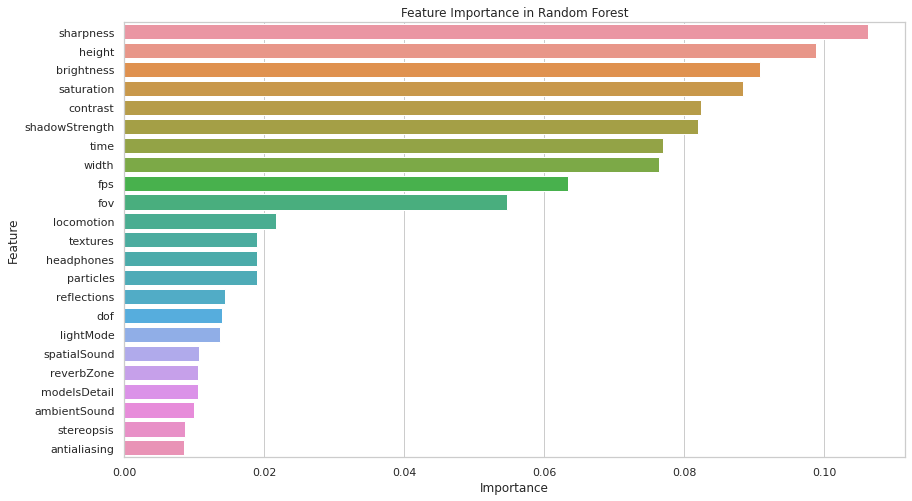

In [39]:
feature_importance = pd.DataFrame({
    'features': X_train.columns,
    'coefficients': rf_classifier.feature_importances_
})

feature_importance = feature_importance.sort_values(by='coefficients', ascending=False)


# Plotting the feature importance
plt.figure(figsize=(14, 8))
sns.barplot(x='coefficients', y='features', data=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()